In [1]:
# Import OpenCV
import cv2 
import numpy as np 
# import os

%matplotlib inline 
from matplotlib import pyplot as plt
import pylab 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # figure size params

In [2]:
# os.getcwd()

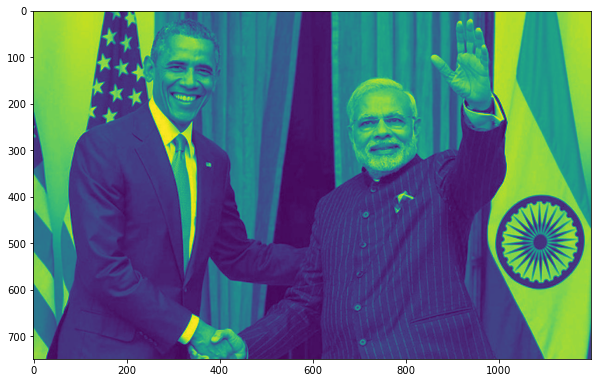

In [3]:
# Set path 

path = r'C:\\Users\\Martynas\\Downloads\\ync_opencv_demo2.jpg'
   
# Reading our image
# https://www.thehindubusinessline.com/news/obama-meets-pm-modi-in-delhi/article9979172.ece
src = cv2.imread(path)
   
# Window name in which image is displayed
window_name = 'Image'
  
# Use cv2.cvtColor() method
# Use cv2.COLOR_BGR2GRAY color space
# conversion code
image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
  
# Display the image 
cv2.imshow(window_name, image)
plt.imshow(image)

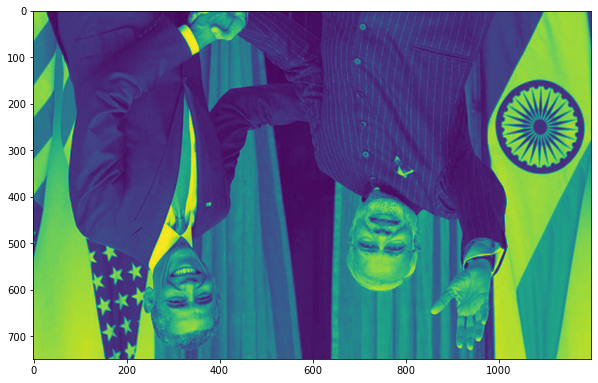

In [3]:
# Flip the image

flipped_code_0=cv2.flip(image,0) # vertical flip
plt.imshow(flipped_code_0)

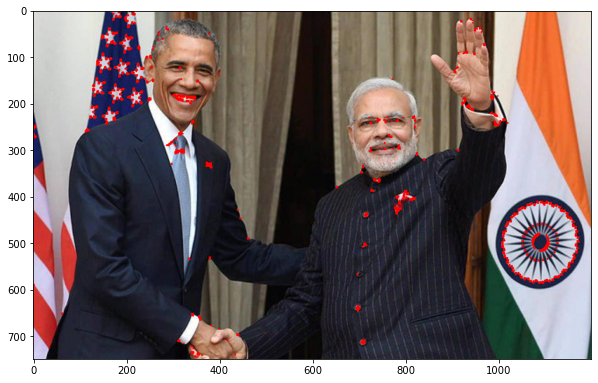

In [4]:
harris_test=src.copy()

#greyscale
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 
kernel_size=3 # Sobel

# run the harris corner detector and dilate te result for marking corners
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # Parameters: blocksize, Sobel parameter,  Harris threshold
dst = cv2.dilate(dst,None)

# Plot the image, show corners in red
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

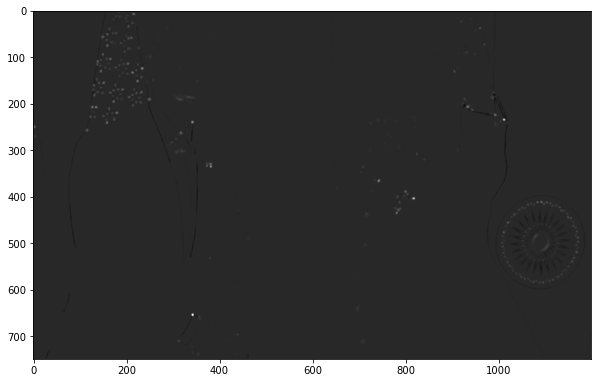

In [5]:
plt.imshow(dst,cmap = 'gray') 

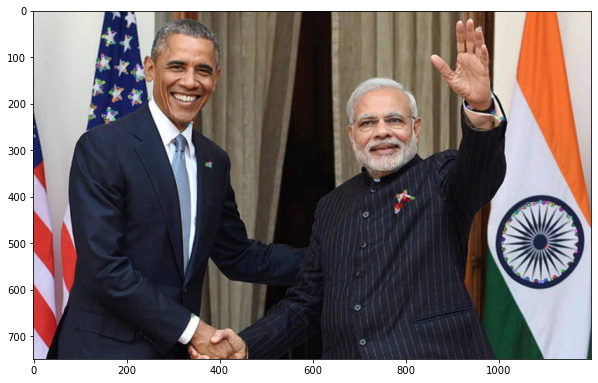

In [6]:
orbimg=src.copy()

orb = cv2.ORB_create()

# Keypoints
kp = orb.detect(orbimg,None)

# Descriptors
kp, des = orb.compute(orbimg, kp)

# Keypoints draw
cv2.drawKeypoints(orbimg,kp,orbimg)

plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))

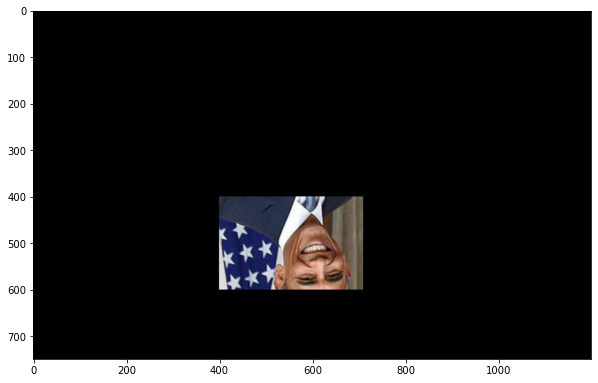

In [10]:
img2match=np.zeros(src.shape,np.uint8)
picture=src[100:300, 120:430] # copy out a bit
img2match[100:300,120:430]=[0,0,0] # blank that region
picture=cv2.flip(picture,0) #flip the copy
img2match[400:400+picture.shape[0], 400:400+picture.shape[1]]=picture # paste it back somewhere else
plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

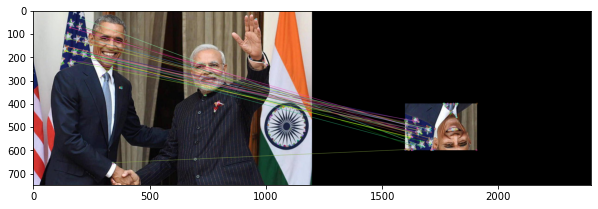

In [11]:
kp2 = orb.detect(img2match,None)

# Descriptors
kp2, des2 = orb.compute(img2match, kp2)

# BFMatcher object creation for Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Descriptors matching
matches = bf.match(des,des2)
 
# Sorting descriptors by distance between matches by best match
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 50 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:30], orbimg)
 
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))

# There are some errors in matching, but most of the matches are correct